In [553]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.style.use('ggplot')
df1=pd.read_csv("MergerdAyush_Colleges_in_India_01-04-2021_0 (1).csv")

df1.head()

,State or Union Territory,Type of System,No. of Colleges - Govt,Admission Capacity - Govt,Permitted Seats - Govt,No. of Colleges - Non-Govt,Admission Capacity - Non-Govt,Permitted Seats - Non-Govt
0,Andhra Pradesh,Ayurveda,1,100,100,2,176,118
1,Assam,Ayurveda,1,93,93,0,0,0
2,Bihar,Ayurveda,2,211,211,6,280,153
3,Chhattisgarh,Ayurveda,2,216,216,4,280,250
4,Delhi,Ayurveda,3,359,359,0,0,0


In [554]:
len(df1)
df2=df1.groupby('State or Union Territory',as_index=False).sum()
# df2.head()
# df2=

C:\Users\RAJESH SOLANKI\AppData\Local\Temp\ipykernel_8920\837784499.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2=df1.groupby('State or Union Territory',as_index=False).sum()


In [555]:
df_t=df2["No. of Colleges - Non-Govt"]+df2["No. of Colleges - Govt"]
df2["total"]=df_t
# df_stack.set_index('State or Union Territory').plot(kind='bar', stacked=True, color=['steelblue', 'red'])
df2=df2.sort_values("total",ascending=False)
# df2.head()

Text(0.5, 0, 'number of colleges ayurvedic colleges')

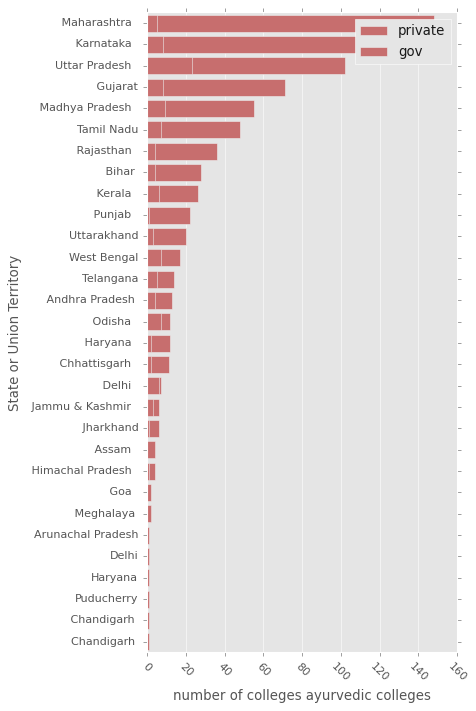

In [556]:

plt.figure(figsize=(5,10))
plt.xticks(rotation=-45)
# sns.set_color_codes("pastel")

sns.barplot(data=df2,y=df2["State or Union Territory"],x=df2["total"],ci=None,color="r",label="private")
# sns.set_color_codes("muted")
sns.barplot(data=df2,y=df2["State or Union Territory"],x=df2["No. of Colleges - Govt"],ci=None,color="r",label="gov")
plt.legend()
plt.xlabel("number of colleges ayurvedic colleges")

In [557]:
df1["Type of System"].unique()

array(['Ayurveda', 'Unani', 'Siddha', 'Naturopathy', 'Homoeopathy'],
      dtype=object)

<AxesSubplot: ylabel='State or Union Territory'>

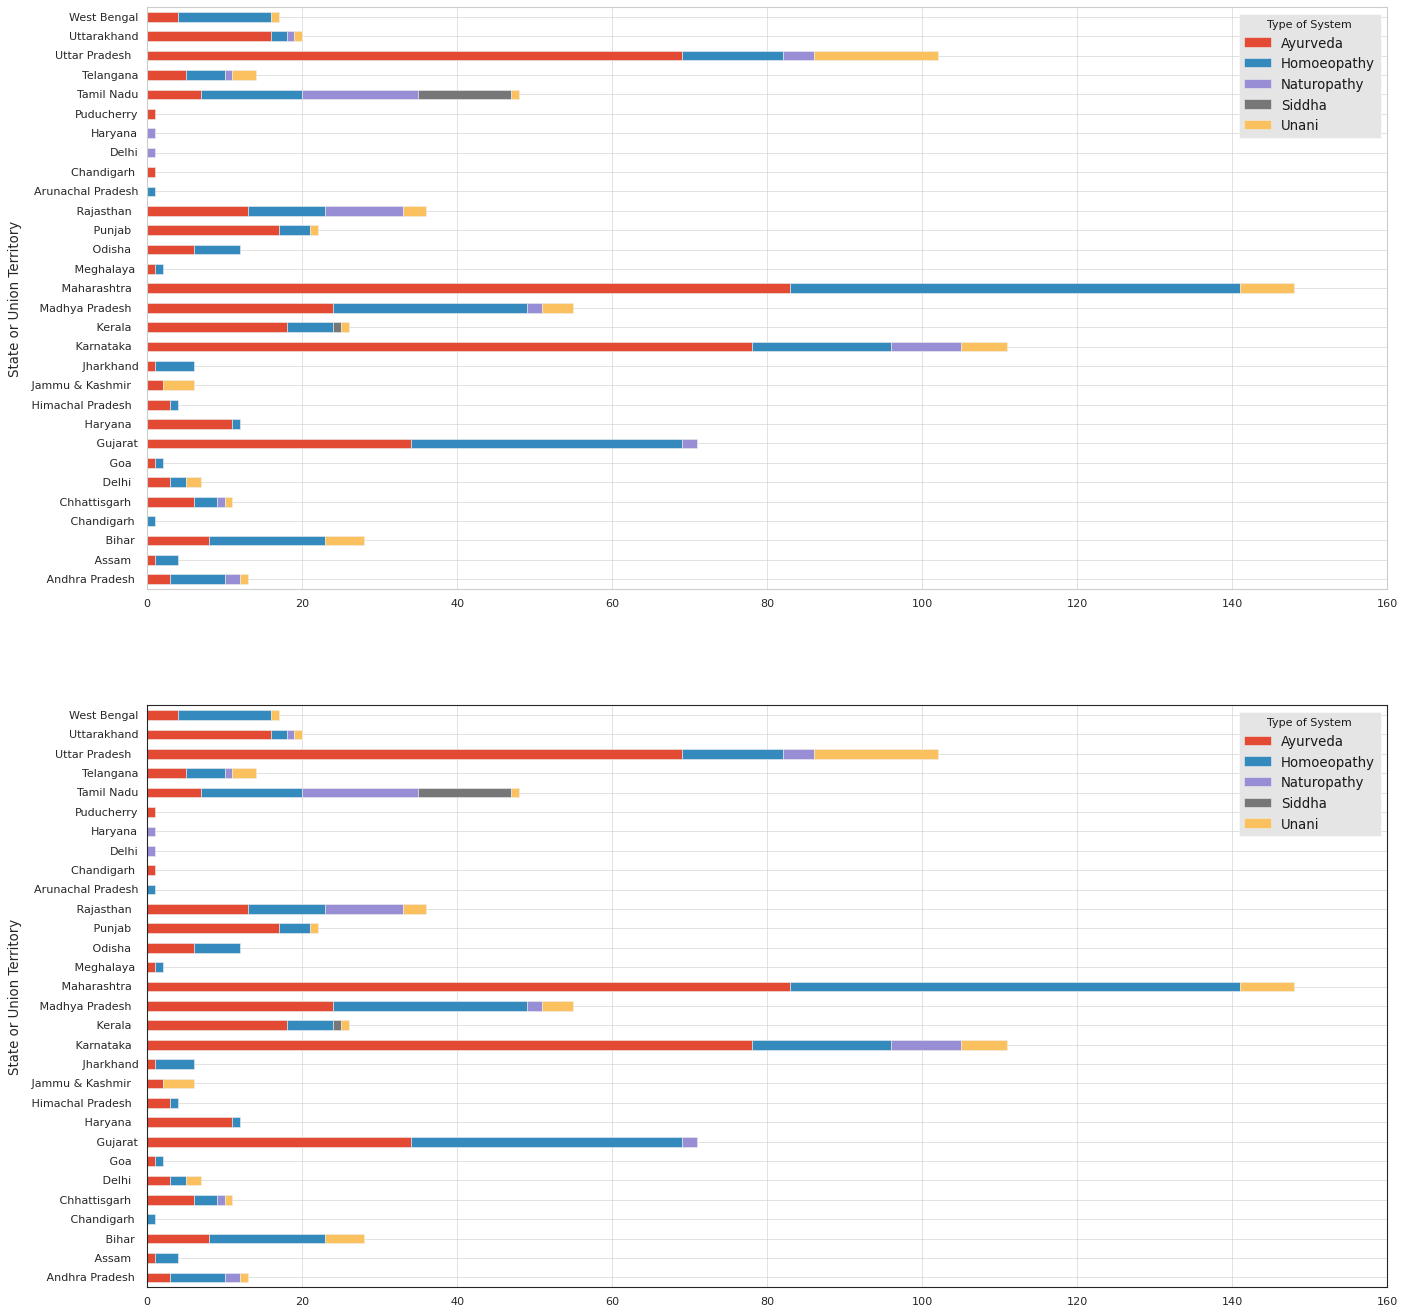

In [558]:
len(df1)
df_t=df1["No. of Colleges - Non-Govt"]+df1["No. of Colleges - Govt"]
df1["total"]=df_t
df3=pd.pivot(df1, index="State or Union Territory", columns="Type of System", values="total")
df3.head()
df3=df3.fillna(0)
df3.reset_index(inplace=True)
df3=df3.set_index('State or Union Territory')
# sns.barplot(data=df3,y=df3["State or Union Territory"],x=df3["Ayurveda"],ci=None,color="b",label="private")
# sns.barplot(data=df3,y=df3["State or Union Territory"],x=df3["Unani"],ci=None,color="g",label="private")
# sns.barplot(data=df3,y=df3["State or Union Territory"],x=df3["Siddha"],ci=None,color="r",label="private")

# df3=df3.drop("Type of System",axis=1)
df3.head()

# matplotlib.style.use('seaborn-poster')
fig = plt.figure()
with sns.axes_style("whitegrid"):
    ax1 = fig.add_subplot(211)
with sns.axes_style("white"):
    ax2 = fig.add_subplot(212)

df3.plot(kind = 'barh', stacked = True,figsize=(20, 20),ax=ax1,style='dark')
# matplotlib.style.use('classic')
df3.plot(kind = 'barh', stacked = True,figsize=(20, 20),ax=ax2,style='seaborn-white')

In [559]:
df1=pd.read_csv("Production_of_Agriculture_Stock-Ministry_of_Finance.csv")
df1.head()

,Particulars,Frequency,Unit,9-2013,10-2013,11-2013,12-2013,1-2014,2-2014,3-2014,4-2014,5-2014,6-2014
0,Foodgrains,Monthly,Ton mn,59.24,62.68,59.69,58.37,55.91,52.48,48.39,63.06,69.85,65.34
1,Foodgrains Rice,Monthly,Ton mn,19.03,16.85,14.22,14.70,16.94,18.88,20.28,20.42,20.65,21.24
2,Foodgrains Unmilled Paddy in term of Rice,Monthly,Ton mn,4.11,11.73,14.41,15.62,14.77,12.76,10.28,8.24,7.61,4.30
3,Foodgrains Wheat,Monthly,Ton mn,36.10,34.10,31.07,28.05,24.20,20.84,17.83,34.40,41.59,39.80


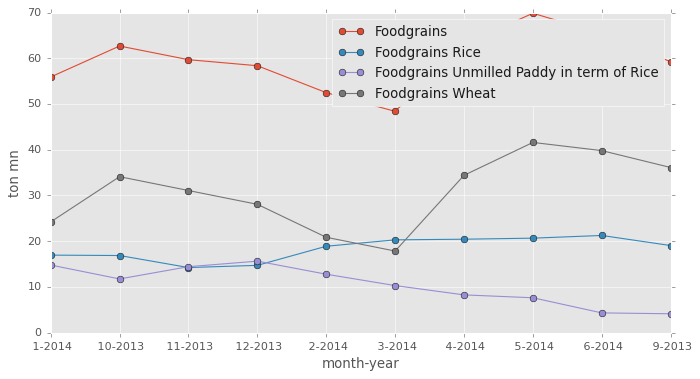

In [560]:
df1=pd.read_csv("Production_of_Agriculture_Stock-Ministry_of_Finance.csv")
df1=df1.drop(["Frequency","Unit"],axis=1)
df1=df1.set_index("Particulars")
df1.head()
col=df1.columns
df1 = pd.melt(df1, value_vars=col,value_name='stock', ignore_index=False)
df1=df1.reset_index()
# df1=df1.set_index("variable")
df1=pd.pivot(df1, index="variable", columns="Particulars", values="stock")
df1.head()
df1.plot(figsize=(10,5),xlabel="month-year",ylabel='ton mn',marker='o')
plt.legend(bbox_to_anchor=(1.0, 1.0)) # to move legend outside

In [561]:
df1=pd.read_csv("Road_Transport_BRS_2017-18_Annexure7_9c.csv")
df1.head()

,Name of the States,National Highways,State Highways,District Roads,Rural Roads,Urban Roads,Project Roads,Total road Length,Total Population,Road length per '000 pop,Road length per '000 Population - National Highways,Road length per '000 Population - State Highways,Road length per '000 Population - District Roads,Road length per '000 Population - Rural Roads,Road length per '000 Population - Urban roads,Road length per '000 Population - Project Roads
0,Andhra Pradesh,10207,15753,58083,217892,34878,9447,346260,84581,4.09,0.12,0.19,0.69,2.58,0.41,0.11
1,Arunachal Pradesh,2537,13500,8731,20807,56,4924,50555,1384,36.54,1.83,9.76,6.31,15.04,0.04,3.56
2,Assam,3909,2530,6093,303672,5603,21803,343609,31206,11.01,0.13,0.08,0.20,9.73,0.18,0.70
3,Bihar,4877,4006,11145,258800,9184,2559,290571,104099,2.79,0.05,0.04,0.11,2.49,0.09,0.02
4,Chhattisgarh,3592,4176,11965,54308,12765,15772,102578,25545,4.02,0.14,0.16,0.47,2.13,0.50,0.62


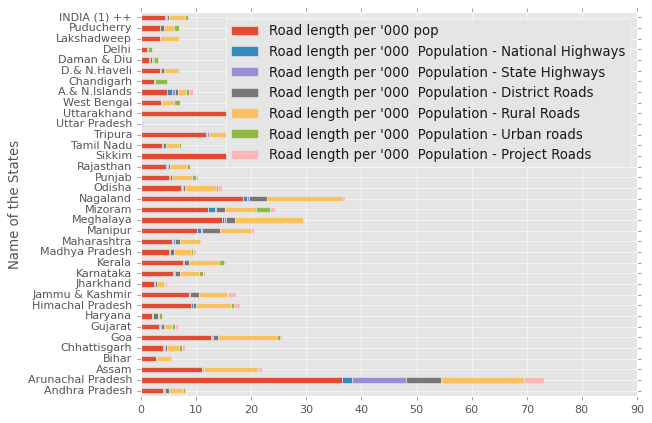

In [562]:
df1=pd.read_csv("Road_Transport_BRS_2017-18_Annexure7_9c.csv")
df1.head()

df1=df1.drop(df1.iloc[:,[1,2,3,4,5,6,7,8]],axis=1)

df1=df1.set_index("Name of the States")
df1.plot(kind="barh",stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1.0)) # to move legend outside